In [ ]:
from google.colab import drive
drive.mount('/content/Splitdataset0101')

Mounted at /content/Splitdataset0101


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import random
from glob import glob
import imageio
from sklearn.preprocessing import LabelBinarizer
import shutil
from tensorflow.keras.models import load_model
from keras.applications import EfficientNetV2B0
from re import VERBOSE
import gc
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




In [ ]:


# Replace '/content/drive/MyDrive/Dataset/train_dataset' with your actual train path
source_path = '/content/Splitdataset0101/MyDrive/train_dataset'
destination_path = '/content/local_train_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)


'/content/local_train_dataset'

In [ ]:

source_path = '/content/Splitdataset0101/MyDrive/valid_dataset'
destination_path = '/content/local_Valid_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)

'/content/local_Valid_dataset'

In [ ]:

source_path = '/content/Splitdataset0101/MyDrive/test_dataset'
destination_path = '/content/local_test_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)

'/content/local_test_dataset'

In [ ]:
# all train class names...
train_dir = sorted(os.listdir('/content/local_train_dataset'))
class_names_lst = [dir_name for dir_name in train_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
# all train class names...
test_dir = sorted(os.listdir('/content/local_test_dataset'))
class_names_lst = [dir_name for dir_name in test_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
# all train class names...
val_dir = sorted(os.listdir('/content/local_Valid_dataset'))
class_names_lst = [dir_name for dir_name in val_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
data_path = '/content/'
train_dir = os.path.join(data_path,'local_train_dataset')
test_dir = os.path.join(data_path, 'local_test_dataset')
val_dir = os.path.join(data_path, 'local_Valid_dataset')

In [ ]:
images_path= os.path.join(train_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
train_images = []
train_labels = []
for i in images:
    train_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    train_labels.append(i.split('/')[-2])
train_X = np.asarray(train_images)
train_Y = pd.DataFrame(train_labels)

In [ ]:
images_path= os.path.join(val_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
valid_images = []
valid_labels = []
for i in images:
    valid_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    valid_labels.append(i.split('/')[-2])
valid_X = np.asarray(valid_images)
valid_Y = pd.DataFrame(valid_labels)

In [ ]:
images_path= os.path.join(test_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
test_images = []
test_labels = []
for i in images:
    test_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    test_labels.append(i.split('/')[-2])
test_X = np.asarray(test_images)
test_Y = pd.DataFrame(test_labels)

In [ ]:
# Get a list of subdirectories (categories) in the train path
categories = [category for category in os.listdir(source_path) if os.path.isdir(os.path.join(source_path, category))]

# Initialize total count
total_images = 0

# Print the count of images in each category and accumulate the total count
for category in categories:
    category_path = os.path.join(source_path, category)
    num_images = len(os.listdir(category_path))
    total_images += num_images
    print(f"Category: {category}, Number of Images: {num_images}")

# Print the total count of images across all categories
print(f"\nTotal Number of Images Across All Categories: {total_images}")

Category: Shepherd’s Purse, Number of Images: 29
Category: Loose Silky-bent, Number of Images: 78
Category: Scentless Mayweed, Number of Images: 62
Category: Common wheat, Number of Images: 23
Category: Common Chickweed, Number of Images: 66
Category: Charlock, Number of Images: 50
Category: Sugar beet, Number of Images: 54
Category: Maize, Number of Images: 18
Category: Fat Hen, Number of Images: 51
Category: Small-flowered Cranesbill, Number of Images: 51
Category: Cleavers, Number of Images: 31
Category: Black-grass, Number of Images: 41

Total Number of Images Across All Categories: 554


In [ ]:
test_Y

,0
0,Scentless Mayweed
1,Scentless Mayweed
2,Scentless Mayweed
3,Scentless Mayweed
4,Scentless Mayweed
...,...
549,Common Chickweed
550,Common Chickweed
551,Common Chickweed
552,Common Chickweed


In [ ]:
train_Y.rename(columns={0:'species'},inplace=True)
_, train_count = np.unique(train_Y,return_counts=True)
train_df = pd.DataFrame(data = train_count)
a = train_Y['species'].unique()
a = a.tolist()
a.sort()
train_df['Index'] = a
train_df.columns = ['Train','Name']
train_df

,Train,Name
0,212,Black-grass
1,323,Charlock
2,252,Cleavers
3,541,Common Chickweed
4,177,Common wheat
5,387,Fat Hen
6,556,Loose Silky-bent
7,189,Maize
8,414,Scentless Mayweed
9,187,Shepherd’s Purse


In [ ]:
y_train = LabelBinarizer().fit_transform(train_Y.species)
train_label = np.array(y_train,dtype=np.float32)
train_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
valid_Y.rename(columns={0:'species'},inplace=True)
_, valid_count = np.unique(valid_Y,return_counts=True)
valid_df = pd.DataFrame(data = valid_count)
a = valid_Y['species'].unique()
a = a.tolist()
a.sort()
valid_df['Index'] = a
valid_df.columns = ['Valid','Name']
valid_df

,Valid,Name
0,56,Black-grass
1,79,Charlock
2,52,Cleavers
3,106,Common Chickweed
4,53,Common wheat
5,100,Fat Hen
6,128,Loose Silky-bent
7,50,Maize
8,131,Scentless Mayweed
9,58,Shepherd’s Purse


In [ ]:
y_valid = LabelBinarizer().fit_transform(valid_Y.species)
valid_label = np.array(y_valid,dtype=np.float32)
valid_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_Y.rename(columns={0:'species'},inplace=True)
_, test_count = np.unique(test_Y,return_counts=True)
test_df = pd.DataFrame(data = test_count)
a = test_Y['species'].unique()
a = a.tolist()
a.sort()
test_df['Index'] = a
test_df.columns = ['Test','Name']
test_df

,Test,Name
0,41,Black-grass
1,50,Charlock
2,31,Cleavers
3,66,Common Chickweed
4,23,Common wheat
5,51,Fat Hen
6,78,Loose Silky-bent
7,18,Maize
8,62,Scentless Mayweed
9,29,Shepherd’s Purse


In [ ]:
y_test = LabelBinarizer().fit_transform(test_Y.species)
test_label = np.array(y_test,dtype=np.float32)
test_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)


**Image** Normalization




In [ ]:
X_train = train_X
X_test = test_X
X_valid = valid_X
#X_train = train_X.astype('float32') / 255
#X_test = test_X.astype('float32') / 255
#X_valid = valid_X.astype('float32') / 255

### EfficientNetV2B0

## **Using train model with layer optimization**

In [ ]:
base_model = EfficientNetV2B0(include_top=False, weights='imagenet',  input_shape=(224, 224, 3), pooling='avg')
base_model.trainable = True

In [ ]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_3
1 rescaling_2
2 normalization_2
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 b

In [ ]:
for layer in base_model.layers[:207]:
    layer.trainable = False

In [ ]:
for layer in base_model.layers:
    print(f"{layer.name} ({'trainable' if layer.trainable else 'non-trainable'})")

input_3 (non-trainable)
rescaling_2 (non-trainable)
normalization_2 (non-trainable)
stem_conv (non-trainable)
stem_bn (non-trainable)
stem_activation (non-trainable)
block1a_project_conv (non-trainable)
block1a_project_bn (non-trainable)
block1a_project_activation (non-trainable)
block2a_expand_conv (non-trainable)
block2a_expand_bn (non-trainable)
block2a_expand_activation (non-trainable)
block2a_project_conv (non-trainable)
block2a_project_bn (non-trainable)
block2b_expand_conv (non-trainable)
block2b_expand_bn (non-trainable)
block2b_expand_activation (non-trainable)
block2b_project_conv (non-trainable)
block2b_project_bn (non-trainable)
block2b_drop (non-trainable)
block2b_add (non-trainable)
block3a_expand_conv (non-trainable)
block3a_expand_bn (non-trainable)
block3a_expand_activation (non-trainable)
block3a_project_conv (non-trainable)
block3a_project_bn (non-trainable)
block3b_expand_conv (non-trainable)
block3b_expand_bn (non-trainable)
block3b_expand_activation (non-trainable

In [ ]:
 # Create a new model and set EfficientNetB2 as its input

model=Sequential()
model.add(base_model)
model.add(Dropout(0.3892263644877882))
model.add(Dense(12, activation='softmax'))

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.09956522756789522),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Function  (None, 1280)             5919312   
 al)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 12)                15372     
                                                                 
Total params: 5,934,684
Trainable params: 2,541,772
Non-trainable params: 3,392,912
_________________________________________________________________


In [ ]:
model.save('my_pretrain_model.h5')

In [ ]:
print(os.path.getsize("my_pretrain_model.h5")/1048576, "MB")

23.05523681640625 MB


In [ ]:
checkpoint = ModelCheckpoint("best_hyper_model.h5",
                             monitor='val_accuracy',  # You can choose the metric to monitor (e.g., 'val_accuracy')
                             save_best_only=True,  # Save only the best model
                             mode='max',  # 'min' for loss, 'max' for accuracy, etc.
                             verbose=1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True
        )
datagen.fit(X_train)


In [ ]:
# Train the model
history=model.fit(datagen.flow(X_train, train_label,batch_size=32) ,epochs=100,  validation_data=(X_valid, valid_label), callbacks=[checkpoint])

Epoch 1/100
125/125 [==============================] - ETA: 0s - loss: 1.0284 - accuracy: 0.6848
Epoch 1: val_accuracy improved from -inf to 0.87262, saving model to best_hyper_model.h5
125/125 [==============================] - 79s 560ms/step - loss: 1.0284 - accuracy: 0.6848 - val_loss: 0.4010 - val_accuracy: 0.8726
Epoch 2/100
125/125 [==============================] - ETA: 0s - loss: 0.4107 - accuracy: 0.8638
Epoch 2: val_accuracy improved from 0.87262 to 0.89067, saving model to best_hyper_model.h5
125/125 [==============================] - 68s 544ms/step - loss: 0.4107 - accuracy: 0.8638 - val_loss: 0.3033 - val_accuracy: 0.8907
Epoch 3/100
125/125 [==============================] - ETA: 0s - loss: 0.2973 - accuracy: 0.8999
Epoch 3: val_accuracy improved from 0.89067 to 0.91976, saving model to best_hyper_model.h5
125/125 [==============================] - 68s 542ms/step - loss: 0.2973 - accuracy: 0.8999 - val_loss: 0.2493 - val_accuracy: 0.9198
Epoch 4/100
125/125 [=============

### **CALLING SAVED MODEL**

In [ ]:
model1 = load_model('best_hyper_model.h5')

In [ ]:
print(os.path.getsize("best_hyper_model.h5")/1048576, "MB")

23.057159423828125 MB


In [ ]:
loss, acc = model1.evaluate(X_test,test_label)
loss1, acc1 = model1.evaluate(X_valid,valid_label)
loss2, acc2 = model1.evaluate(datagen.flow(X_valid,valid_label))
print('Test loss:', loss,'   Test accuracy:', acc)
print('Train loss:', loss1,'   Train accuracy:',acc1)
print('Train loss:', loss2,'   Train accuracy:',acc2)

32/32 [==============================] - 15s 419ms/step - loss: 0.1591 - accuracy: 0.9579
Test loss: 0.15163829922676086    Test accuracy: 0.9476534128189087
Train loss: 0.1720999926328659    Train accuracy: 0.9578736424446106
Train loss: 0.15911483764648438    Train accuracy: 0.9578736424446106


18/18 [==============================] - 5s 200ms/step


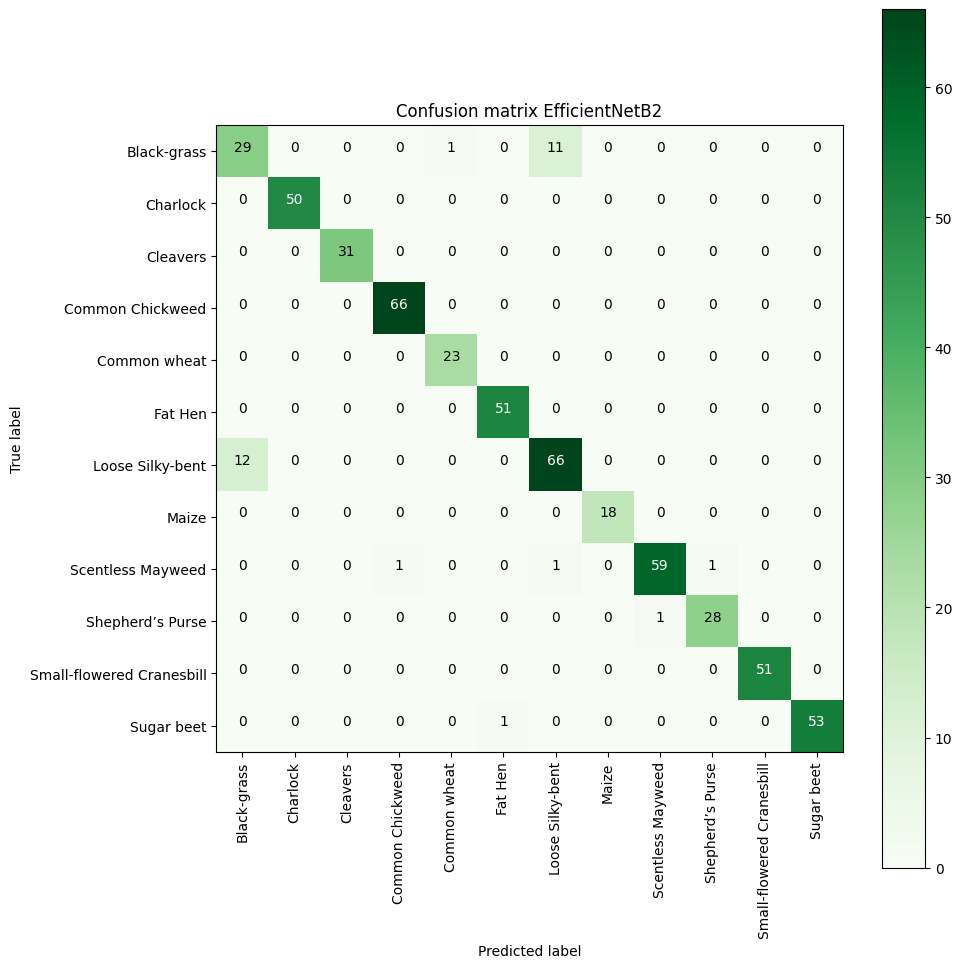

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix EfficientNetB2',
                          cmap=plt.cm.Greens):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = model1.predict(X_test)
predYClasses = np.argmax(predY, axis = 1)
trueY = np.argmax(test_label, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = class_names_lst)

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(trueY, predYClasses, average='macro')) # macro, take the average of each class’s F-1 score:
print(f1_score(trueY, predYClasses, average='micro')) #micro calculates positive and negative values globally
print(f1_score(trueY, predYClasses, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses, average=None))

0.9531959458720186
0.9476534296028881
0.9476205636874702
[0.70731707 1.         1.         0.9924812  0.9787234  0.99029126
 0.84615385 1.         0.96721311 0.96551724 1.         0.99065421]


In [ ]:
from sklearn.metrics import classification_report

# Define your title
title = "Classification Report EfficientNetB2"

# Calculate the padding to center the title
padding_length = (80 - len(title)) // 2

# Create the formatted title with centered and bold text
formatted_title = f"\033[1;32;47m{' ' * padding_length}{title}{' ' * padding_length}\033[m"

# Print the formatted title
print(formatted_title)

print(classification_report(trueY, predYClasses, target_names=class_names_lst))

                      Classification Report EfficientNetB2                      
                           precision    recall  f1-score   support

              Black-grass       0.71      0.71      0.71        41
                 Charlock       1.00      1.00      1.00        50
                 Cleavers       1.00      1.00      1.00        31
         Common Chickweed       0.99      1.00      0.99        66
             Common wheat       0.96      1.00      0.98        23
                  Fat Hen       0.98      1.00      0.99        51
         Loose Silky-bent       0.85      0.85      0.85        78
                    Maize       1.00      1.00      1.00        18
        Scentless Mayweed       0.98      0.95      0.97        62
         Shepherd’s Purse       0.97      0.97      0.97        29
Small-flowered Cranesbill       1.00      1.00      1.00        51
               Sugar beet       1.00      0.98      0.99        54

                 accuracy                     

**Observation:**



*   Recall is very low for Black-grass.
*   Precison is below .70 for Black grass.
*   Even from Confusion matrix, we see model did not perform well for black grass.
*   Other classes have better balane between precision and recall and a goof f1 score.

Overall Accuracy is also great.





In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(trueY, predYClasses)

array([[[501,  12],
        [ 12,  29]],

       [[504,   0],
        [  0,  50]],

       [[523,   0],
        [  0,  31]],

       [[487,   1],
        [  0,  66]],

       [[530,   1],
        [  0,  23]],

       [[502,   1],
        [  0,  51]],

       [[464,  12],
        [ 12,  66]],

       [[536,   0],
        [  0,  18]],

       [[491,   1],
        [  3,  59]],

       [[524,   1],
        [  1,  28]],

       [[503,   0],
        [  0,  51]],

       [[500,   0],
        [  1,  53]]])

**Each plant category level TP, FP, FN, TN can be seen from above matrix:**

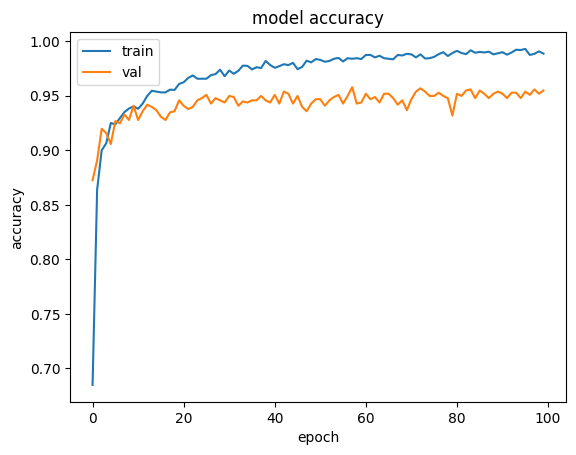

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()




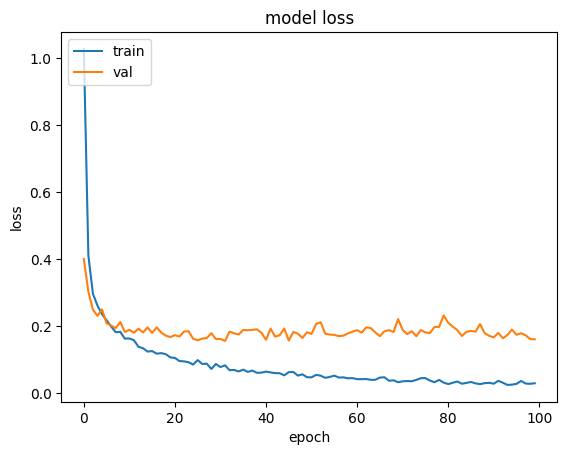

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


**Observation:**


*   Loss is decreasing and val loss is close to training loss
*   Accuracy of val set is also close to training accuracy
*   No overfitting or underfitting observerd based on the scores of val and testing sets





